In [1]:
import warnings
warnings.filterwarnings('ignore')


#importing libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np
import datetime
import math
import joblib
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts

#Read dataset
df = pd.read_excel(r'C:\Users\Malyaj Mishra\Desktop\DS_IT\Projects\Cars24\data.xlsx',sheet_name='data'\
                   ,parse_dates=['inspectionStartTime'])
meta = pd.read_excel(r'C:\Users\Malyaj Mishra\Desktop\DS_IT\Projects\Cars24\data.xlsx',sheet_name='fields summary')

In [2]:
meta
#Metadata--->a set of data that describes and gives information about other data.

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
...,...,...,...
68,engineTransmission_comments_value_3,comments,Independent
69,engineTransmission_comments_value_4,comments,Independent
70,fuel_type,fuel type,Independent
71,odometer_reading,mileage,Independent


In [3]:
df.head(10)

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0
5,aj_06,2019-01-31 11:53:01,2011,11,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,NaN,NaN,NaN,NaN,Diesel,91916,3.5
6,aj_07,2019-04-04 17:00:12,2012,3,Yes,NaN,NaN,NaN,NaN,NaN,...,Abnormal Noise,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,121006,3.5
7,aj_08,2019-04-08 12:47:09,2016,2,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,41534,4.0
8,aj_09,2019-01-05 16:09:37,2007,4,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,152904,3.0
9,aj_10,2019-01-06 13:38:10,2011,2,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,92340,4.0


In [4]:
#many variables are mostly null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

In [5]:
df.describe()

,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
std,3.766234,3.583866,NaN,NaN,46762.524489,0.847645
min,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000


In [6]:
np.sort(df.rating_engineTransmission.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:
np.sort(df.inspectionStartTime.unique())

array(['2019-01-02T10:02:34.000000000', '2019-01-02T10:04:57.000000000',
       '2019-01-02T10:08:25.000000000', ...,
       '2019-04-15T12:41:04.000000000', '2019-04-15T12:46:46.000000000',
       '2019-04-15T12:47:00.000000000'], dtype='datetime64[ns]')

## Observations:
1. All the variables with YES/NO values will be changed to 1/0 (int values).
2. Huge number of null values in most of the features. Need to fix them or drop them.
3. All of the inspection has been done b/w Jan2019 to April2019.

## Feature Engineering:

In [8]:
#Feature Engineering Cell:

#Changing YES/NO values ---> 1/0.
df[['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value','engineTransmission_engine_value',\
    'engineTransmission_coolant_value','engineTransmission_engineMounting_value','engineTransmission_engineSound_value',\
    'engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value',\
    'engineTransmission_clutch_value','engineTransmission_gearShifting_value',\
    'engineTransmission_engineOil']] = df[['engineTransmission_battery_value',\
                                           'engineTransmission_engineoilLevelDipstick_value',\
                                           'engineTransmission_engine_value','engineTransmission_coolant_value',\
                                           'engineTransmission_engineMounting_value','engineTransmission_engineSound_value',\
                                           'engineTransmission_exhaustSmoke_value',\
                                           'engineTransmission_engineBlowByBackCompression_value',\
                                           'engineTransmission_clutch_value','engineTransmission_gearShifting_value',\
                                           'engineTransmission_engineOil']].replace({'Yes':1,'No':0})

#Make a new feature which tells how old the car is in 'months'.
df['month_old'] = df.apply(lambda row: 12*(row['inspectionStartTime'].year-row['year'])+(row['inspectionStartTime'].\
                                                month-row['month']),axis=1)


#extracting 'date' only and droping 'time' from the InspectionTime column.
df['inspectionStartTime'] = df.apply(lambda row: datetime.datetime(row['inspectionStartTime']\
                                            .year,row['inspectionStartTime'].month,row['inspectionStartTime'].day),axis=1)

#Getting weekday out from the InspectionTime column.
df['weekday'] = df.apply(lambda row: row['inspectionStartTime'].weekday(),axis=1)


#After reading the metadata, it appears we have 11 attributes(YES/NO type) about an Engine which should play a 
#critical role determining the ratings. 

#Calculating attribute score(summation of values) for 11 major aspects: Battery, engine oil level dip stick,
#engine, coolant, engine mounting, engine sound, exhaust smoke, engine blow by back compression, clutch, 
#gear shifting, engine oil
df['attribute_score'] = df[['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value',\
                            'engineTransmission_engine_value','engineTransmission_coolant_value',\
                            'engineTransmission_engineMounting_value','engineTransmission_engineSound_value',\
                            'engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value',\
                            'engineTransmission_clutch_value','engineTransmission_gearShifting_value',\
                            'engineTransmission_engineOil']].sum(axis=1)

In [9]:
#Filling Null values. 1)If 95% of the column is empty, dropped.
#2) If null_% is >10%, filled with 'Unknown' else mode of that column.

null_value_percent = (100*df.isna().sum()/len(df)).to_dict()
df = df.drop([x for x,y in null_value_percent.items() if y>95], axis=1)

null_value_percent = (100*df.isna().sum()/len(df)).to_dict()
df = df.fillna({x:('unknown' if y>10 else df[x].mode().values[0])  for x,y in null_value_percent.items()})

## Outlier analysis:

<AxesSubplot:xlabel='attribute_score', ylabel='rating_engineTransmission'>

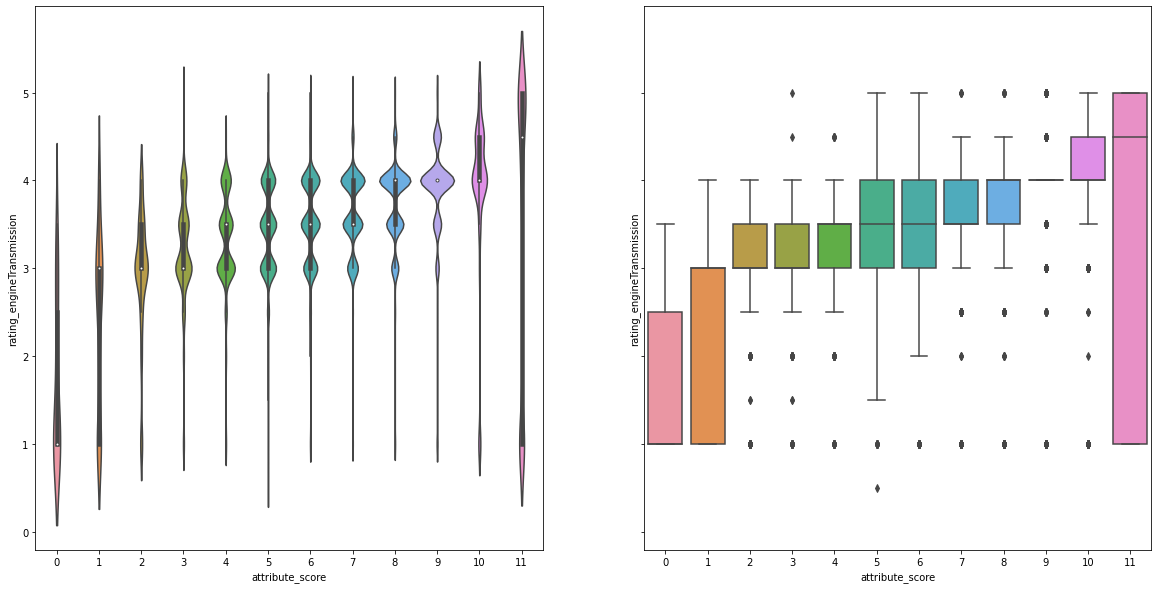

In [10]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,10))
sns.violinplot(x=df['attribute_score'],y=df['rating_engineTransmission'], ax=ax[0], vert=True)
#also making a box plot with it.
sns.boxplot(x=df['attribute_score'],y=df['rating_engineTransmission'], ax=ax[1])

## INFERENCE ABOUT OUTLIERS :
The above plots gives us a fair bit of idea about outliers in ratings given to engines. Some obvious outliers that can be checked: <br>
A) Attribute score=11(max), but rating<=1 <br>
B) Attribute score=0(min), but rating>=3 <br>
C) Attribute score=10, but rating=1 <br>
D) Attribute score=1, but rating>=4 <br>

This is because: <br>
1) When (a)Every aspect  (b)No aspect of engine is OK, having a very (a)Low (b)High rating is ambiguous & suspicious. <br>
2) Violin plot for (a)very high (b)very low attribute scores appears to have 2 distributions for rating which is again suspicious.

# EDA:

<AxesSubplot:title={'center':'rating_wise_distribution'}, xlabel='rating_engineTransmission'>

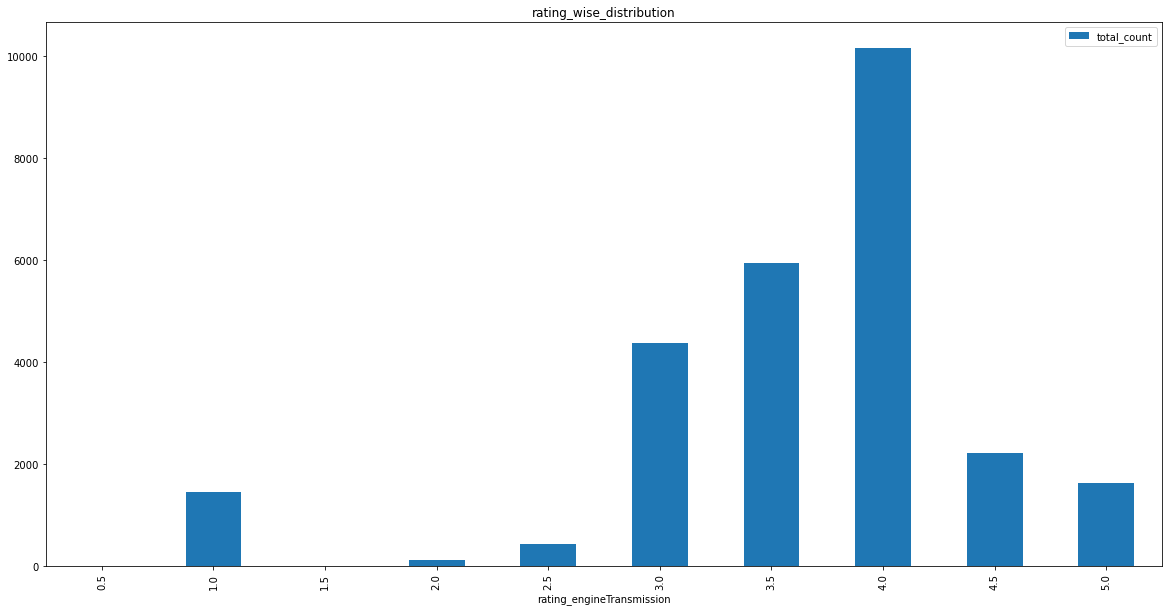

In [11]:
#Making barplot as well to show distribution of target column(ratings):

fig,ax=plt.subplots(figsize=(20,10))
df.groupby(['rating_engineTransmission'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.bar(title='rating_wise_distribution',ax=ax)


In [12]:
df['rating_engineTransmission'].skew()

-1.3952079957851187

## Observations:
1. Majority ratings are in the range of 3-4, with highest being 4.
2. The target variable also looks slightly left-skewed(skew=-1.39). So you might want to fix it when training
    models like Linear regression etc. <br>
NOTE: For right skewed distribution, we take square/cube root or logarithm of variable and for left skewed, we take square/cube or exponential of variables. Also Can try CoxBox transformation method.


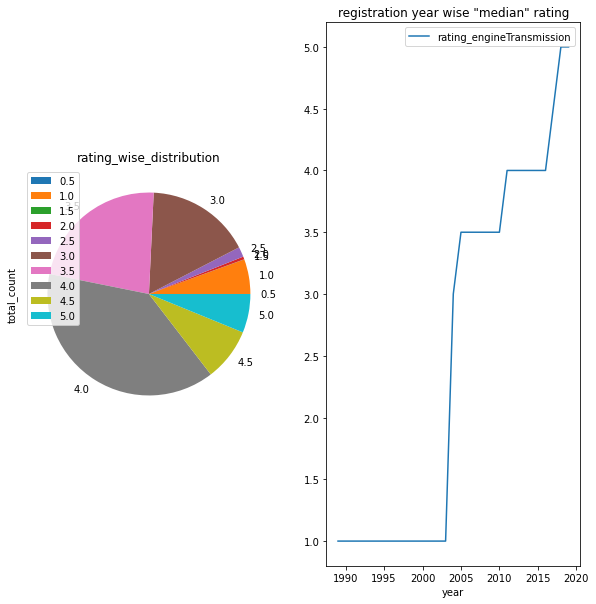

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,5))

df.groupby(['rating_engineTransmission'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.pie(y='total_count',figsize=(10,10),title='rating_wise_distribution',ax=ax[0])

df.groupby(['year'])[['rating_engineTransmission']].median().plot.line(ax=ax[1],title='registration year wise "median" rating')

plt.show()

## Observations:
1. Rating directly correlated to registration year. The older the car, the poorer the rating(see below table):
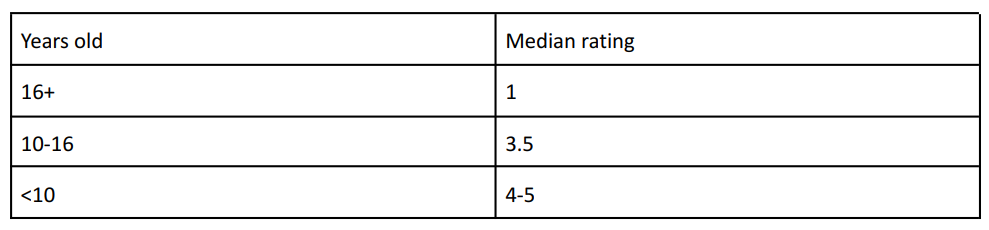
2. Rating increases with increase in car registration year==> Newer the car, higher the rating, as expected.


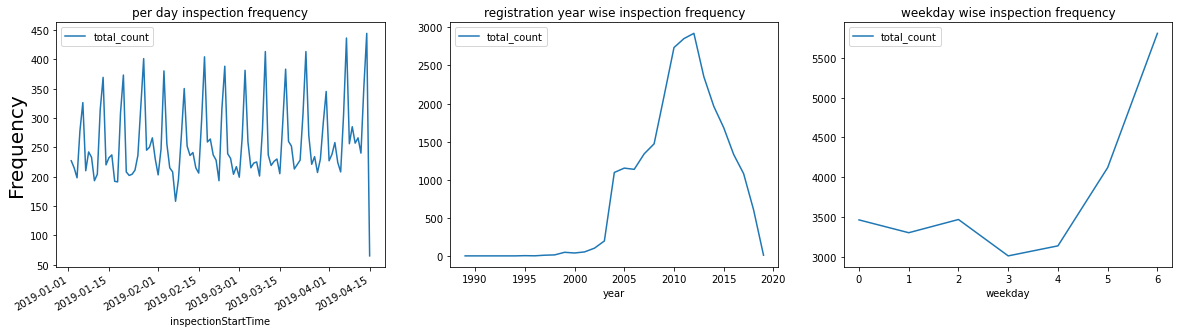

In [14]:
#Some more visualisation.

fig,ax = plt.subplots(1,3,figsize=(20,5))
df.groupby(['inspectionStartTime'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.line(ax=ax[0],title='per day inspection frequency')

df.groupby(['year'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.line(ax=ax[1],title='registration year wise inspection frequency')

df.groupby(['weekday'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.line(ax=ax[2],title='weekday wise inspection frequency')

ax[0].set_ylabel('Frequency', fontsize=20)

plt.show()

## Observations:
1. The majority of cars inspected are 5-15 years old. (Registration year 2005-2015)
2. Usually, inspection frequency is highest on Weekends & lowest on Thursday, Friday. It may be the
case that most folks belong to white collared jobs hence free on weekends.


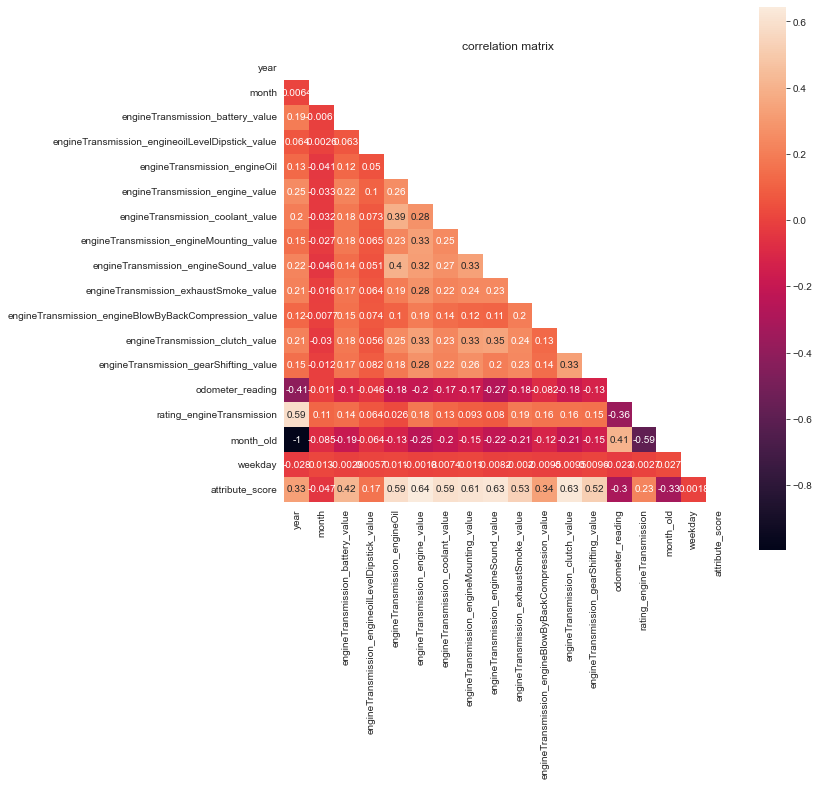

In [15]:
#observing correlation between numerical variables.
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
with sns.axes_style("white"):
    plt.figure(figsize=(10,10))
    plt.title('correlation matrix')
    ax = sns.heatmap(corr, annot=True, mask=mask, square=True)
    plt.show()

## Observations about Correlations:
Major 11 attributes are: Battery, engine oil level dipstick, engine, coolant, engine mounting, engine sound,
exhaust smoke, engine blow-by back compression, clutch, gear shifting, engine oil.<br>
    A. Engine rating has a positive correlation to most major attributes & a negative correlation with<br>
    months_old & odometer reading.<br>
    B. All major attributes show a positive correlation amongst themselves.<br>
    C. Months_old has a negative correlation with all major attributes & Same is the case with odometer_reading.<br>

In [16]:
#Just for self-practice. Check below output to understand pivot-table functioning.
#Understanding of Pivot-table will be helpful in next cell.
df.pivot_table(index=["engineTransmission_battery_value"],columns=['rating_engineTransmission'],\
               values=['appointmentId'],aggfunc='count')

appointmentId                            \
rating_engineTransmission                  0.5     1.0  1.5   2.0    2.5   
engineTransmission_battery_value                                           
0                                          NaN   247.0  5.0  51.0  110.0   
1                                          1.0  1209.0  1.0  66.0  310.0   

                                                                          
rating_engineTransmission            3.0     3.5     4.0     4.5     5.0  
engineTransmission_battery_value                                          
0                                  944.0   876.0  1107.0    88.0    10.0  
1                                 3435.0  5068.0  9045.0  2121.0  1613.0

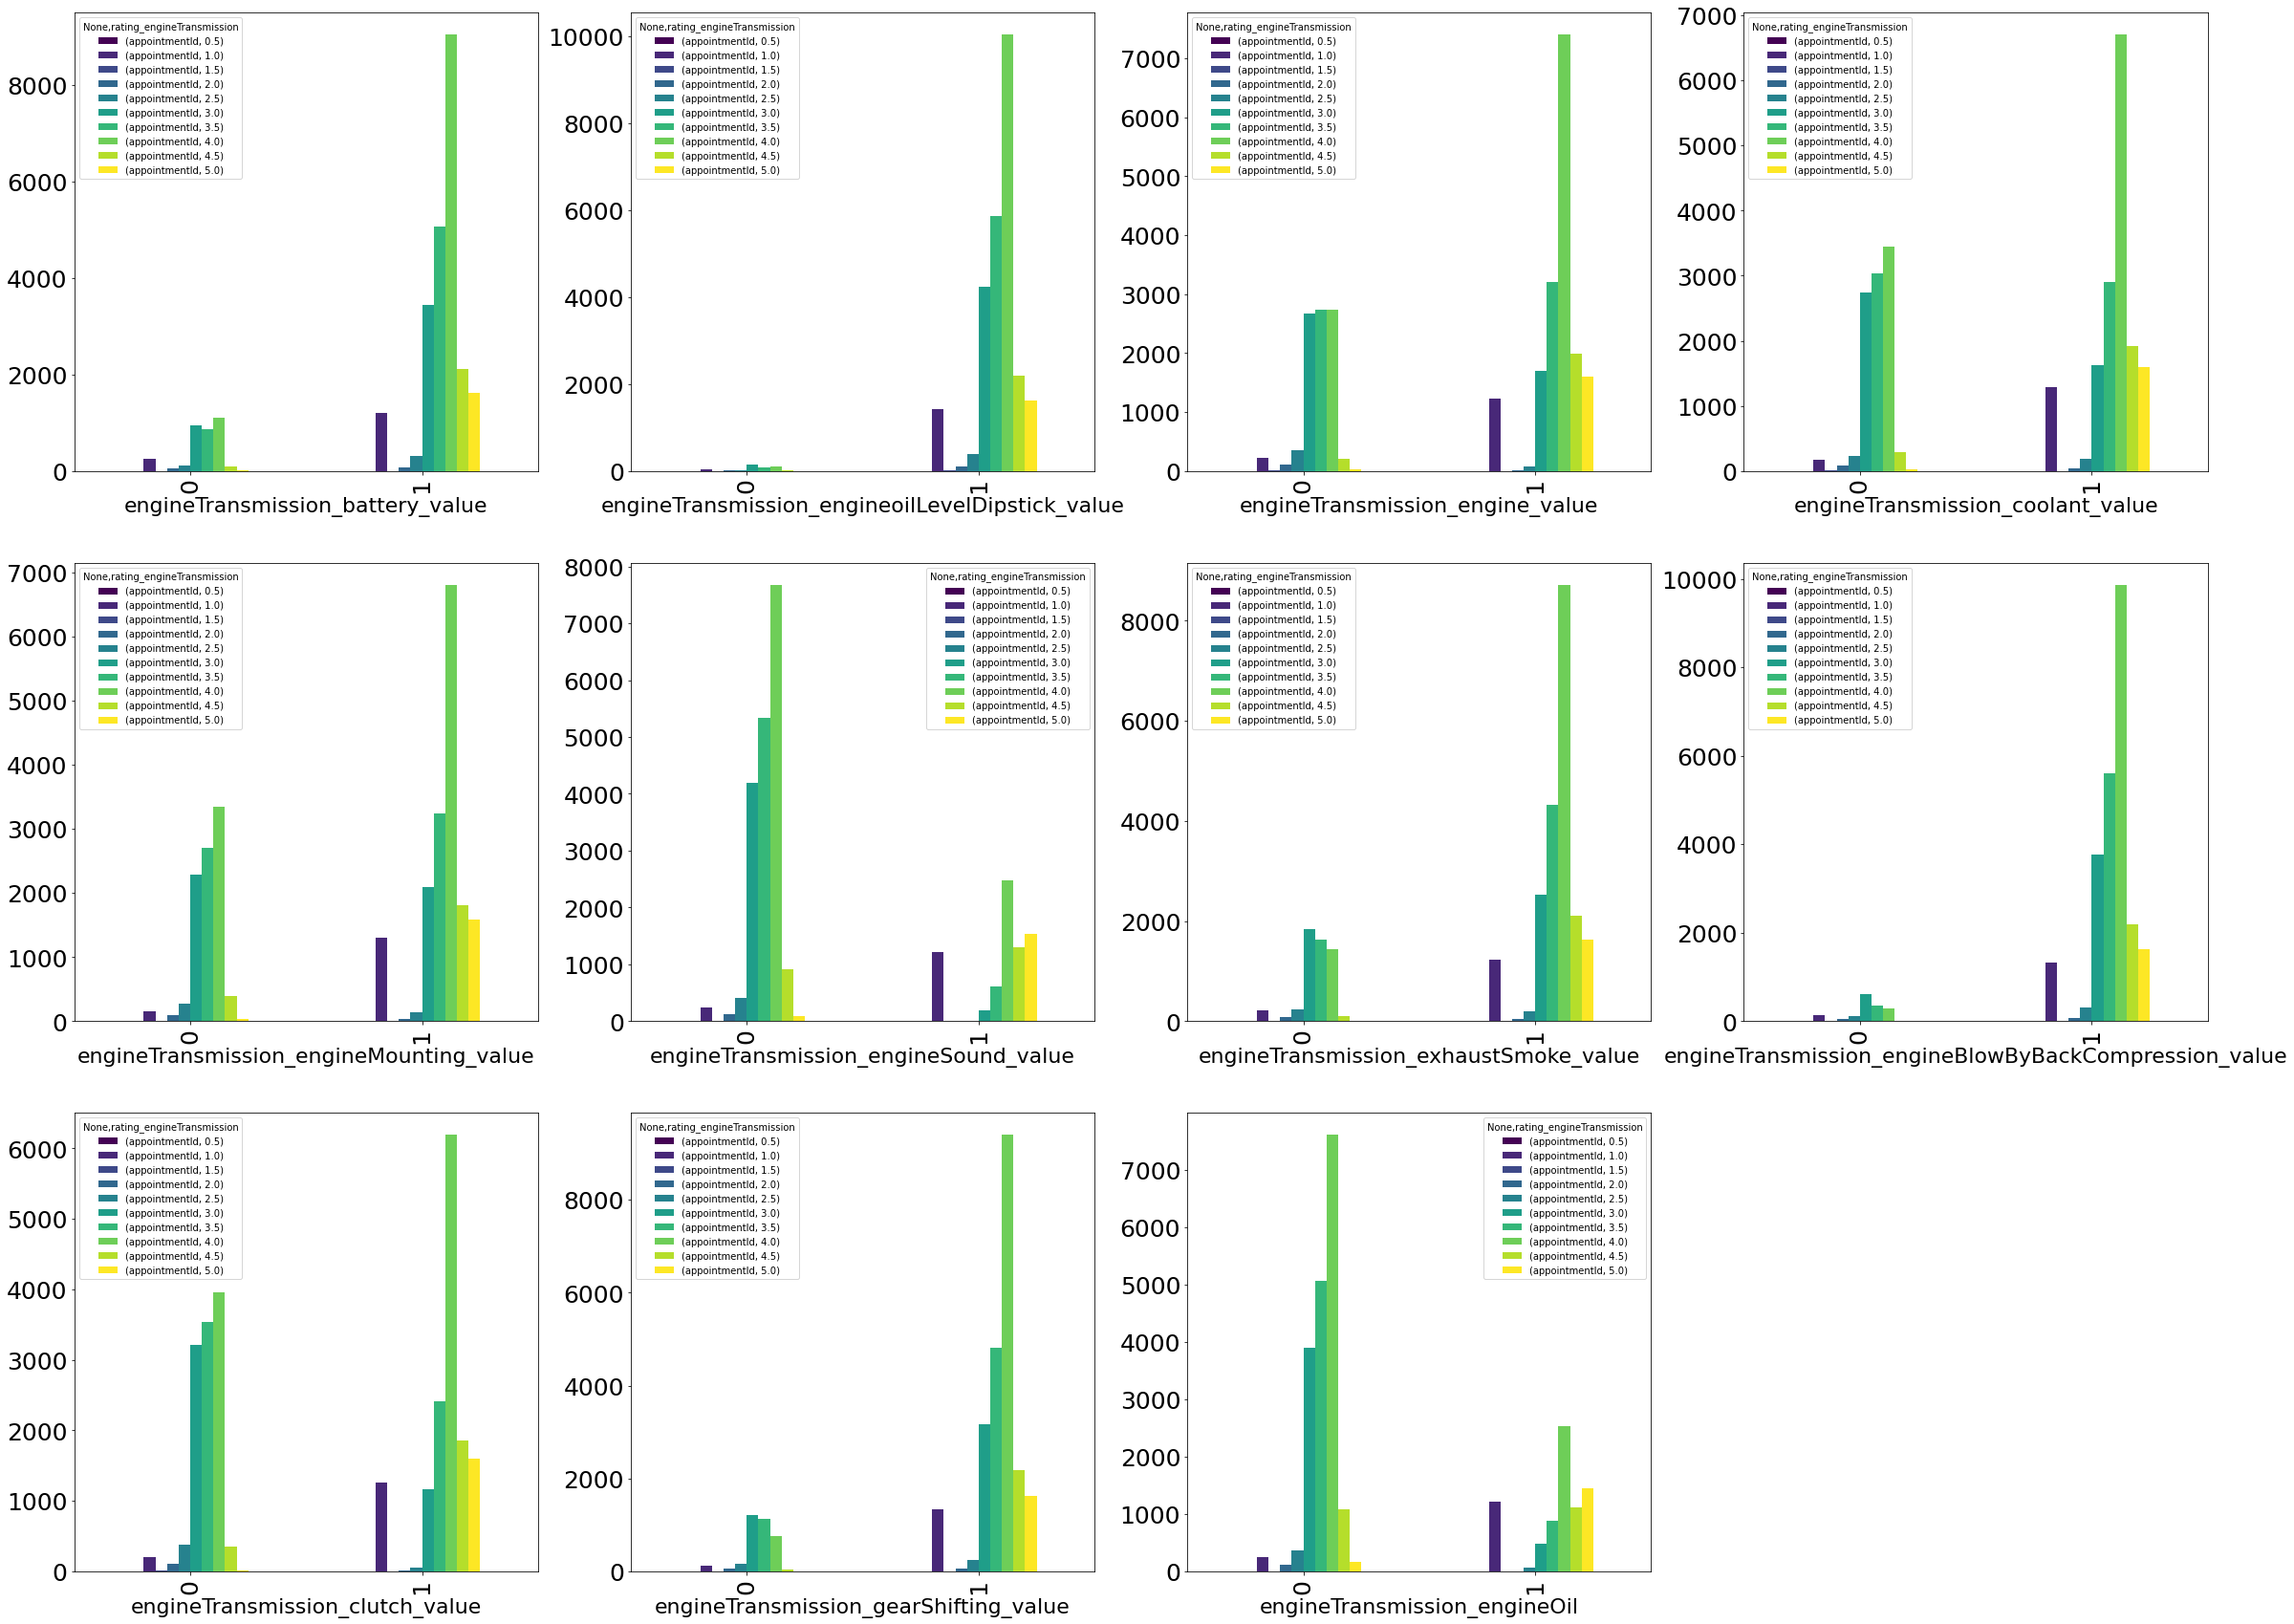

In [17]:
#Distribution of different variable w.r.t to target variable(ratings).
fig,ax = plt.subplots(3,4,figsize=(40,30))
for index,column in enumerate(['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value',\
                               'engineTransmission_engine_value','engineTransmission_coolant_value',\
                               'engineTransmission_engineMounting_value','engineTransmission_engineSound_value',\
                               'engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value',\
                               'engineTransmission_clutch_value','engineTransmission_gearShifting_value',\
                               'engineTransmission_engineOil']):
    row,columns = index//4,index%4
    df.pivot_table(index=[column],columns=['rating_engineTransmission'],values=['appointmentId'],aggfunc='count')\
    .plot.bar(cmap='viridis',ax=ax[row,columns])
    ax[row,columns].set_xlabel(column,fontsize=22)
    plt.setp(ax[row,columns].get_xticklabels(),fontsize=25)
    plt.setp(ax[row,columns].get_yticklabels(),fontsize=25)
ax[2,3].set_visible(False)

<Figure size 432x288 with 0 Axes>

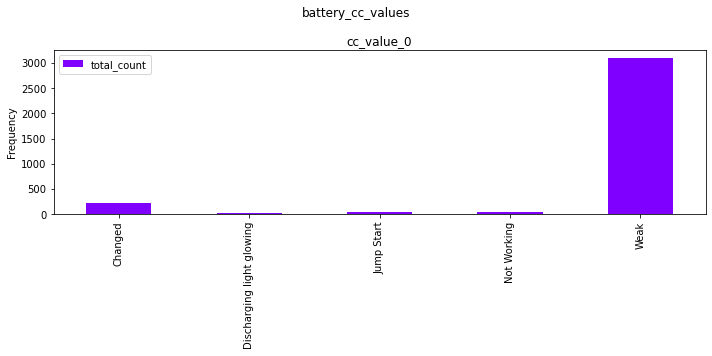

<Figure size 432x288 with 0 Axes>

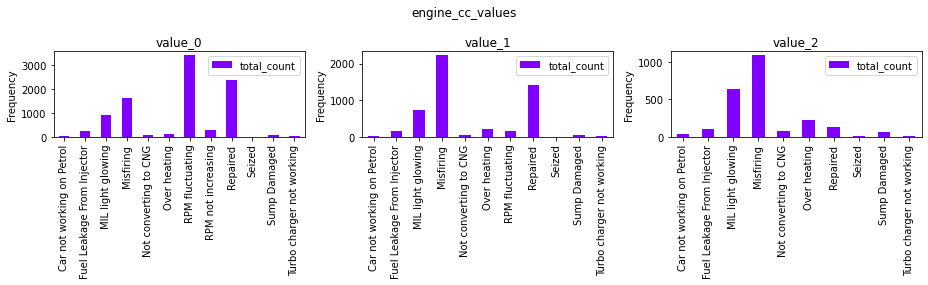

<Figure size 432x288 with 0 Axes>

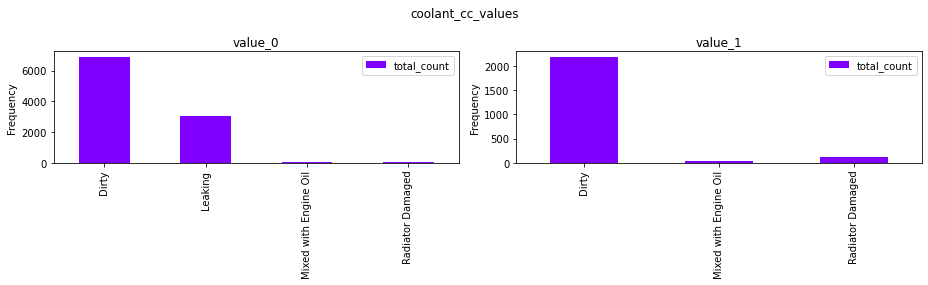

<Figure size 432x288 with 0 Axes>

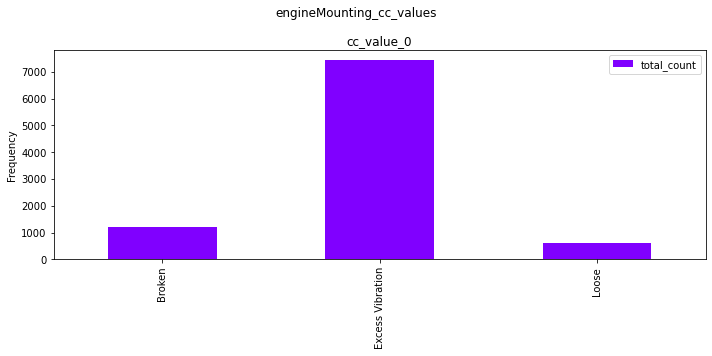

<Figure size 432x288 with 0 Axes>

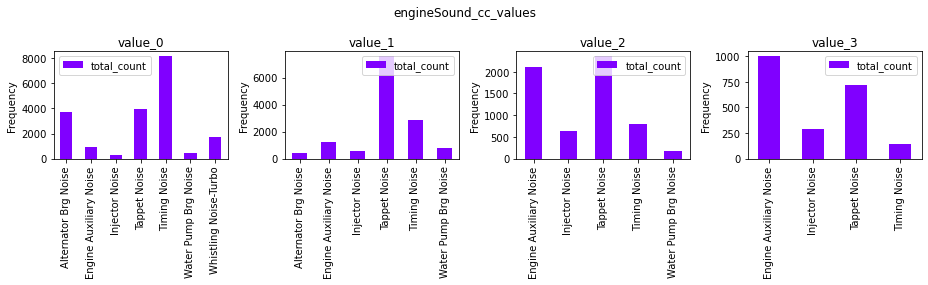

<Figure size 432x288 with 0 Axes>

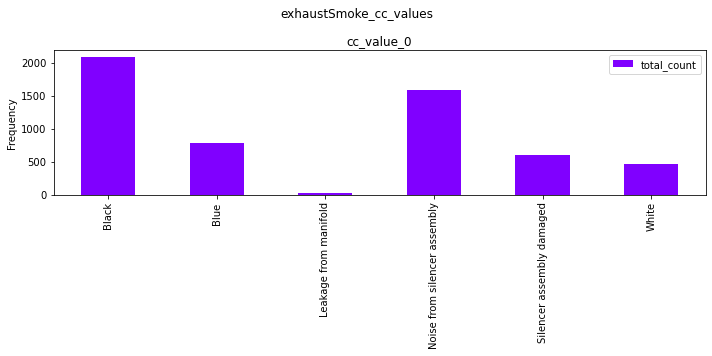

<Figure size 432x288 with 0 Axes>

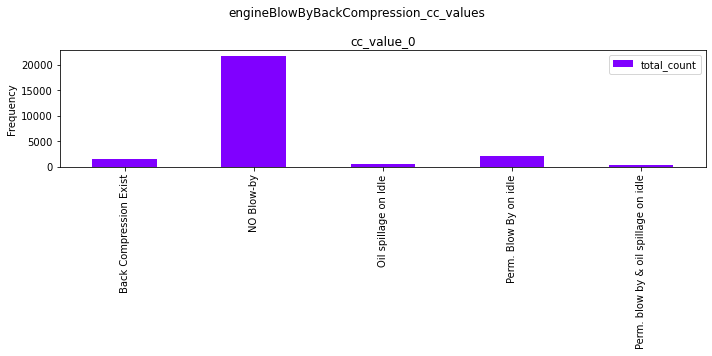

<Figure size 432x288 with 0 Axes>

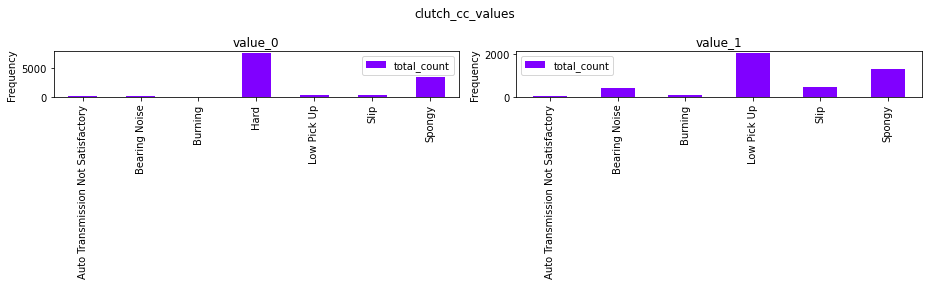

<Figure size 432x288 with 0 Axes>

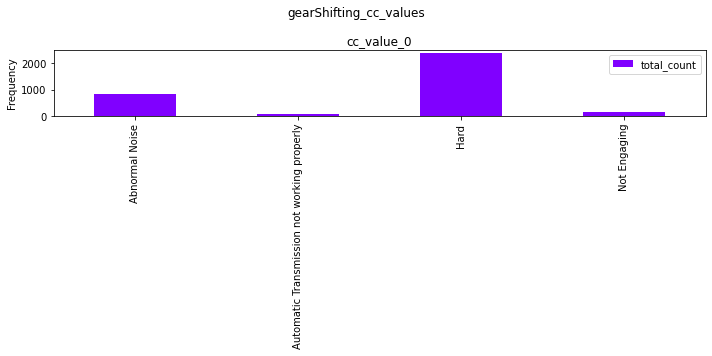

<Figure size 432x288 with 0 Axes>

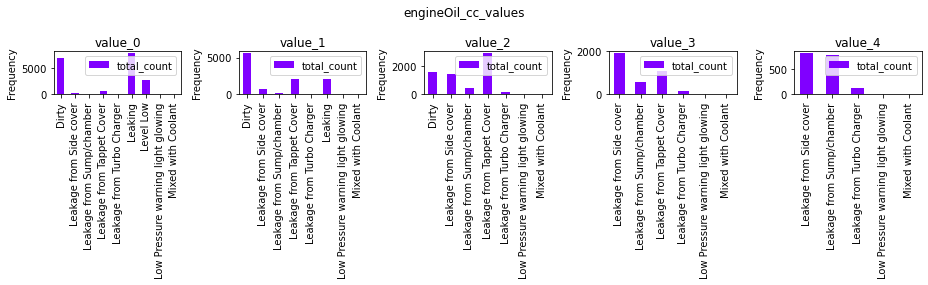

<Figure size 432x288 with 0 Axes>

In [18]:
# plotting total count of cc_values of different features & checking their distribution.

plt.clf()
for index_,column in enumerate(['engineTransmission_battery_value','engineTransmission_engineoilLevelDipstick_value',\
                                'engineTransmission_engine_value','engineTransmission_coolant_value',\
                                'engineTransmission_engineMounting_value','engineTransmission_engineSound_value',\
                                'engineTransmission_exhaustSmoke_value','engineTransmission_engineBlowByBackCompression_value',\
                                'engineTransmission_clutch_value','engineTransmission_gearShifting_value',\
                                'engineTransmission_engineOil']):
    entity_checked = column.split('_')[1]
    cols_to_plot = [x for x in df.columns if entity_checked+'_cc' in x]
    if len(cols_to_plot)==0:
        continue
    elif len(cols_to_plot)==1:
        fig, ax = plt.subplots(figsize=(10,5))
        df[df[cols_to_plot[0]]!='unknown'].groupby(cols_to_plot[0])[['appointmentId']].count()\
        .rename(columns={'appointmentId':'total_count'}).plot.bar(cmap='rainbow',\
        title='_'.join(cols_to_plot[0].split('_')[-3:]),ax=ax)
        
        ax.set_xlabel('')
        ax.set_ylabel('Frequency')
        
    else:   
        fig, ax = plt.subplots(1,len(cols_to_plot),figsize=(13,4))
        for index,col in enumerate(cols_to_plot):
                df[df[col]!='unknown'].groupby(col)[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
                .plot.bar(cmap='rainbow',ax=ax[index],title='_'.join(col.split('_')[-2:]))
                
                ax[index].set_xlabel('')
                ax[index].set_ylabel('Frequency')
    fig.suptitle(entity_checked+'_cc_values')
    fig.tight_layout()
    plt.show()
    plt.clf()

# Observations: (usual comments for different features):
1. Battery ----------> Weak
2. Clutch ---------->Hard, low pickup
3. Engine ---------->Misfiring, RPM Fluctuating, Repaired
4. Coolant ---------->Excessive vibration, Broken
5. Engine Sound ---------->Tappet, timing, alternator brg & auxiliary noise
6. Exhaust Smoke ---------->Black
7. Engine Blow By Compression ---------->No Blow by
8. Gear Shifting ---------->Hard
9. Engine Oil ----------> Dirty, leaking, leakage from the tappet cover or side cover

Text(0.5, 0, 'Engine_Ratings')

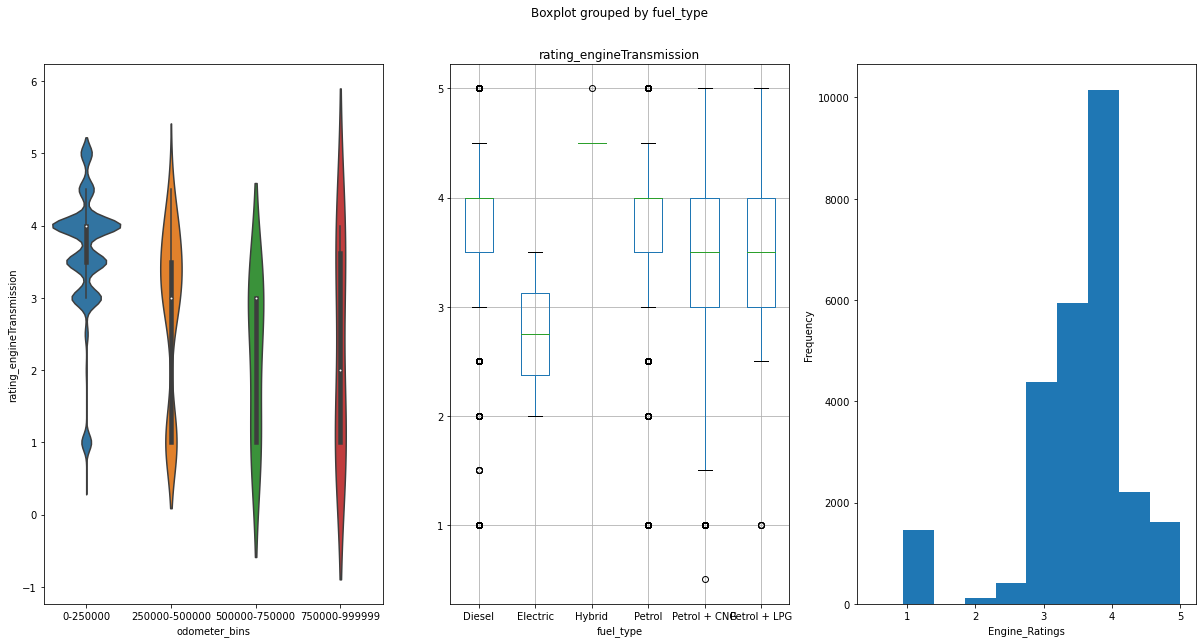

In [19]:
# Plots to understand relationship between Fuel_type, odo_meter_reading Vs Ratings of engine.

fig, ax = plt.subplots(1,3,figsize=(20,10))
df['odometer_bins'] = pd.cut(df['odometer_reading'],bins=4,precision=0,include_lowest=True)\
.map(lambda x: '{}-{}'.format(int(0 if x.left<0 else x.left),int(x.right)))

sns.violinplot(x=df['odometer_bins'],y=df['rating_engineTransmission'],ax=ax[0])
df.boxplot(column=['rating_engineTransmission'],by='fuel_type',ax=ax[1])
df['rating_engineTransmission'].plot.hist(ax=ax[2])
ax[2].set_xlabel('Engine_Ratings')

In [20]:
#Converting categorical/string columns to numerical data.This step can be skipped for CatBoost which can intake categorical data
#We'll use Label Encoder. OHE can also be used.
def text_to_float(column):
    if column.dtype==np.object:
        label_encoder = preprocessing.LabelEncoder()
        column = label_encoder.fit_transform(column.astype(str))
        return column
    return column

df = df.apply(text_to_float)

Skewness of target variable initially is: -1.3952079957851187


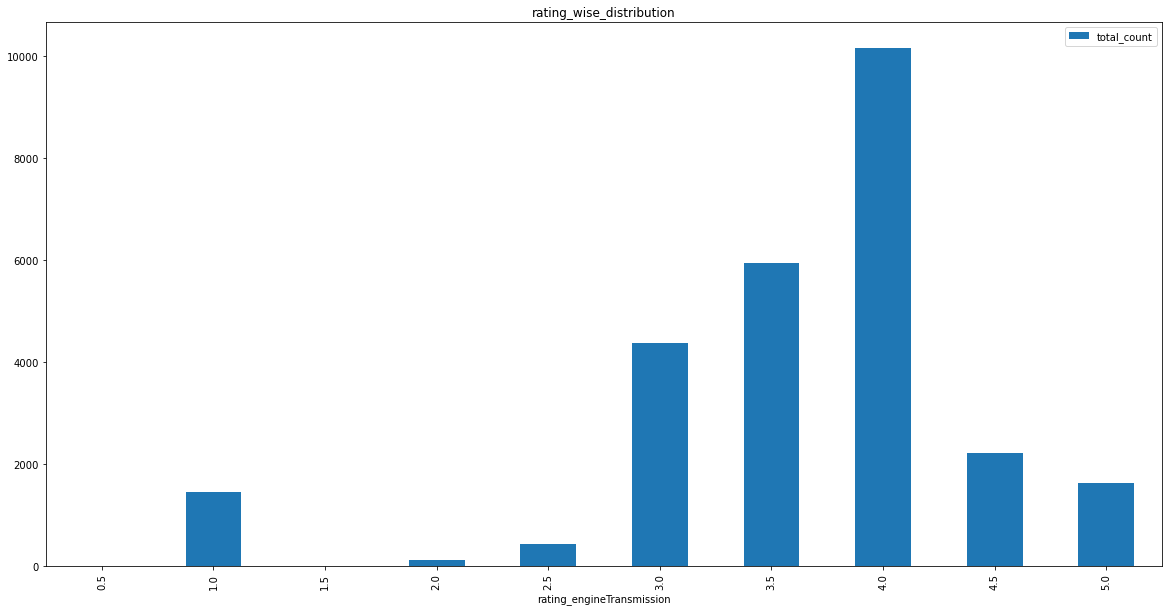

In [21]:
#Making barplot to show distribution of target column(ratings) before resampling:

fig,ax=plt.subplots(figsize=(20,10))
df.groupby(['rating_engineTransmission'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'})\
.plot.bar(title='rating_wise_distribution',ax=ax)

print('Skewness of target variable initially is:', df['rating_engineTransmission'].skew())

In [22]:
#Resampling data by upsampling 'Low rating' samples by factor of 2 (doubling).
#df = pd.concat([df,df[df['rating_engineTransmission']<3]])


#Making barplot to show change post-resampling distribution of target column(ratings):
#fig,ax=plt.subplots(figsize=(20,10))
#df.groupby(['rating_engineTransmission'])[['appointmentId']].count().rename(columns={'appointmentId':'total_count'}).plot.bar(title='rating_wise_distribution',ax=ax)

#print('Skewness of target variable initially is:', df['rating_engineTransmission'].skew())

In [23]:
#Transforming data to fix left-skewness. ||| Normalization of target variable through different methods.

print('Skewness of target variable initially is:', df['rating_engineTransmission'].skew())

#log transform
df['r_trans_log']=np.log(df['rating_engineTransmission'])    
print('Skewness of target variable is after Log transform:', df['r_trans_log'].skew())

#Square root transform
df['r_trans_sqrt']=np.sqrt(df['rating_engineTransmission'])    
print('Skewness of target variable is after SQRT transform:', df['r_trans_sqrt'].skew())

#Exp transform
df['r_trans_exp']=np.exp(df['rating_engineTransmission'])    
print('Skewness of target variable is after Exponent transform:', df['r_trans_exp'].skew())

#Cube transform
df['r_trans_cube']=np.power(df['rating_engineTransmission'],3)    
print('Skewness of target variable is after Cube transform:', df['r_trans_cube'].skew())


#Box-Cox transform
df['r_trans_BoxCox']=stats.boxcox(df['rating_engineTransmission'])[0]
print('Skewness of target variable is after BoxCox transform:', df['r_trans_BoxCox'].skew())

Skewness of target variable initially is: -1.3952079957851187
Skewness of target variable is after Log transform: -2.67312143143953
Skewness of target variable is after SQRT transform: -2.054064266541392
Skewness of target variable is after Exponent transform: 1.4907218652911403
Skewness of target variable is after Cube transform: 0.5338972366648355
Skewness of target variable is after BoxCox transform: -0.07322334839385813


### Observations about Skewness:
We know that skewness between -0.5 to 0.5 is Okay. But if more than that, it must be reduced. <br>
In above output, BoxCox seems to be a good method to normalize as it has brought down skewness to nearly -0.07.(Nearly normalized!!!) Second best performance is by Cube transformation. <br>
So we'll use its results to train our models.

Also note that Log transform and Square root transform are making data even more skewed. May be because we are applying<br>
it to left-skewed data were they are not good performers.

NOTE: Remember??-->For right skewed distribution, we take square/cube root or logarithm of variable and for left skewed, we take square/cube or exponential of variables. Also Can try CoxBox transformation method.

### Visualisation of change in skewness:

<AxesSubplot:xlabel='r_trans_cube', ylabel='Count'>

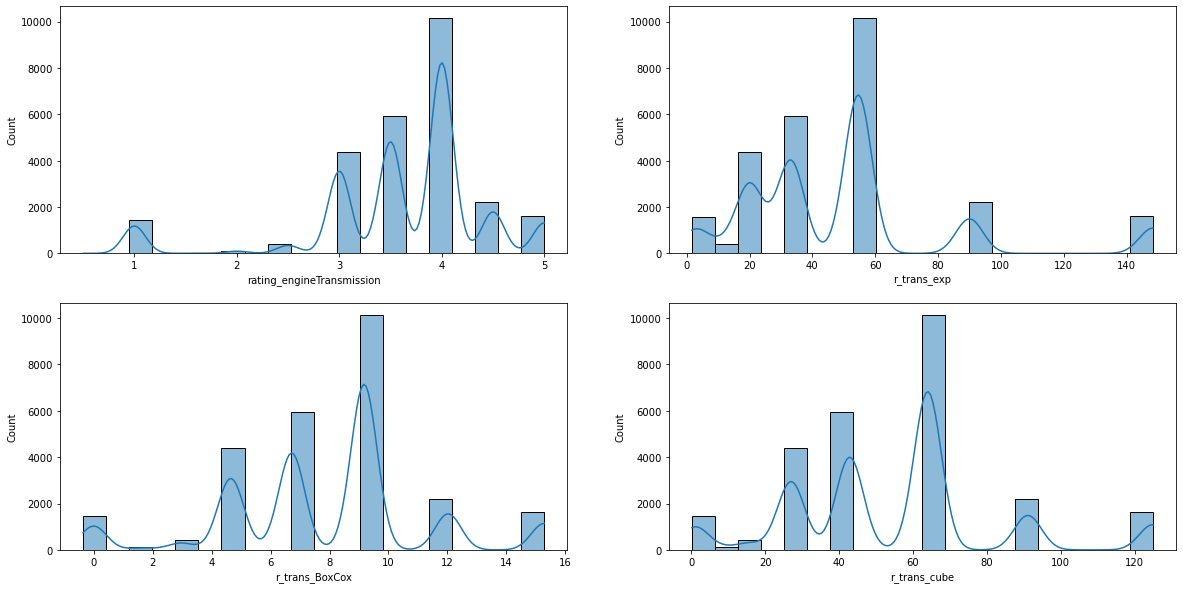

In [24]:
#Visualizing results of best 3 types of normalization techniques.

fig,ax=plt.subplots(2,2,figsize=(20,10))
sns.histplot(df['rating_engineTransmission'],ax=ax[0,0],kde=True,bins=20)
sns.histplot(df['r_trans_exp'],ax=ax[0,1],kde=True,bins=20)
sns.histplot(df['r_trans_BoxCox'],ax=ax[1,0],kde=True,bins=20)
sns.histplot(df['r_trans_cube'],ax=ax[1,1],kde=True,bins=20)

In [25]:
df['r_trans_BoxCox'].describe()


count    26307.000000
mean         7.839396
std          3.393496
min         -0.355314
25%          6.718513
50%          9.171907
75%          9.171907
max         15.284341
Name: r_trans_BoxCox, dtype: float64

In [26]:
#taking out our target variable(ratings) from the dataset.

labels_XGB = df.pop('rating_engineTransmission') 
#Don't give normlized target variable to XGB --> It doesn't need normalized data.

labels_Reg = df.pop('r_trans_BoxCox')            
#Giving Normalized target variable to other Regression models.

In [27]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,...,fuel_type,odometer_reading,month_old,weekday,attribute_score,odometer_bins,r_trans_log,r_trans_sqrt,r_trans_exp,r_trans_cube
0,0,2019-02-03,2008,8,0,4,1,0,5,0,...,4,124600,126,6,2,0-250000,1.098612,1.732051,20.085537,27.000
1,1,2019-01-16,2007,5,1,5,1,0,5,0,...,4,78108,140,2,6,0-250000,1.386294,2.000000,54.598150,64.000
2,2,2019-02-09,2012,5,1,5,1,0,0,8,...,0,93348,81,5,5,0-250000,1.252763,1.870829,33.115452,42.875
3,3,2019-01-18,2013,1,1,5,1,0,0,8,...,4,48233,72,4,8,0-250000,1.252763,1.870829,33.115452,42.875
4,4,2019-01-27,2011,7,1,5,1,0,5,3,...,4,74368,90,6,5,0-250000,1.386294,2.000000,54.598150,64.000


In [28]:
#dropping some columns
df = df.drop(['inspectionStartTime','appointmentId','weekday','odometer_bins','attribute_score',\
              'r_trans_log','r_trans_sqrt','r_trans_exp','r_trans_cube'],axis=1)

LR: 0.433635 (0.005144)
Ridge: 0.433638 (0.005143)
XGB: 0.732468 (0.009295)
Lasso: 0.378752 (0.002225)


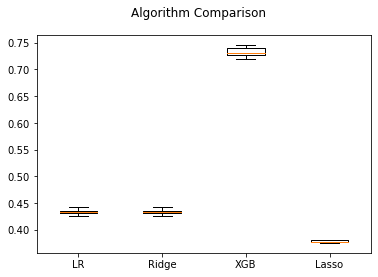

In [29]:
#comparing different models using r_squared score as metric

models,results,names = [],[],[]
models.append(('LR', linear_model.LinearRegression()))
models.append(('Ridge', linear_model.Ridge()))
models.append(('XGB', XGBRegressor(n_estimators=100)))
models.append(('Lasso', linear_model.Lasso()))

#Cross-Validation
scoring = 'r2'
for name, model in models:
    
    if name=='XGB':
        cv_results = model_selection.cross_val_score(model, df, labels_XGB, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = model_selection.cross_val_score(model, df, labels_Reg, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#Box plot for algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
#Tuning some hyperparameters for XGBRegressor, the best performing model from above analysis. 
#Tuning on some parameters for demonstartion else would have taken time to train.

import optuna
def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 100,200)
        max_depth = int(trial.suggest_loguniform('max_depth', 3, 15))
        clf = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        return model_selection.cross_val_score(clf, df, labels_XGB ,cv=3, scoring='r2').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2022-11-02 19:54:03,826] A new study created in memory with name: no-name-66a9e5be-aa8d-4237-9d7c-6081f444dcaa
[I 2022-11-02 19:54:11,389] Trial 0 finished with value: 0.7290515371324745 and parameters: {'n_estimators': 127, 'max_depth': 5.90612466829233}. Best is trial 0 with value: 0.7290515371324745.
[I 2022-11-02 19:54:18,502] Trial 1 finished with value: 0.7250034742462192 and parameters: {'n_estimators': 199, 'max_depth': 3.373961053056029}. Best is trial 0 with value: 0.7290515371324745.
[I 2022-11-02 19:54:29,136] Trial 2 finished with value: 0.724057942971223 and parameters: {'n_estimators': 124, 'max_depth': 7.319078779173584}. Best is trial 0 with value: 0.7290515371324745.
[I 2022-11-02 19:54:35,070] Trial 3 finished with value: 0.7243767723421364 and parameters: {'n_estimators': 165, 'max_depth': 3.560618185092533}. Best is trial 0 with value: 0.7290515371324745.
[I 2022-11-02 19:55:04,351] Trial 4 finished with value: 0.6987127826669827 and parameters: {'n_estimators':

In [31]:
print('best_parameter_set',study.best_params)
print('best r2 score',study.best_value)

best_parameter_set {'n_estimators': 127, 'max_depth': 5.90612466829233}
best r2 score 0.7290515371324745


In [32]:
train_x, test_x, train_y, test_y = tts(df,labels_XGB,train_size=0.8)

adjusted_r2= 0.7290805809565171


<AxesSubplot:xlabel='importance'>

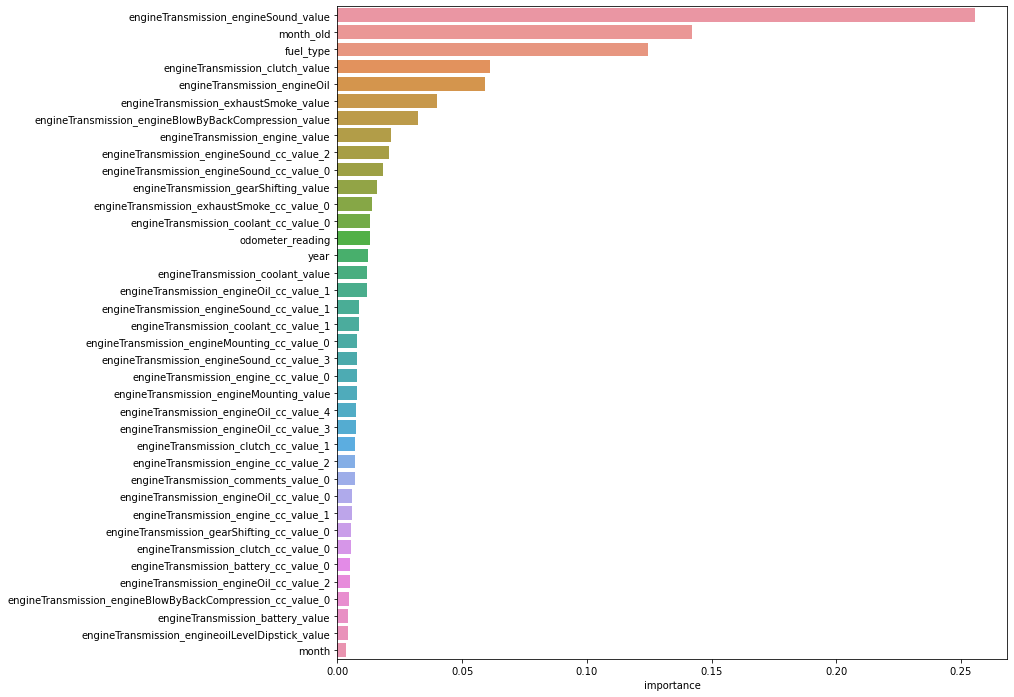

In [33]:
import sklearn
model = XGBRegressor(n_estimators=study.best_params['n_estimators'],max_depth=int(round(study.best_params['max_depth'],0)))
model.fit(train_x,train_y)
predictions = model.predict(test_x)
r2 = sklearn.metrics.r2_score(test_y,predictions)
adj_r = 1 - ( 1-r2 ) * ( len(test_y) - 1 ) / ( len(test_y) - test_x.shape[1] - 1 )
print('adjusted_r2=',adj_r)

#figuring feature importance in deciding the target value.
plt.figure(figsize=(12,12))
feature_imp_map = {x:y for x,y in zip(df.columns,model.feature_importances_)}
#sorted() function has an optional parameter called ‘key’ which takes a function as its value. 
#This key function transforms each element before sorting, it takes the value and returns 1 value which is 
#then used within sort instead of the original value.
feature_imp_map = dict(sorted(feature_imp_map.items(), key=lambda item: item[1],reverse=True))
plt.xlabel('importance')
sns.barplot(y=[x for x in feature_imp_map.keys()],x=[x for x in feature_imp_map.values()],orient='h')

## Observations about feature importance:
Analyzing output of above cell, we can say that: Engine_Sound value, Months_old (inspection date- (registration_year+registration_month)) & 
Fuel type appear to be most important features in determining engine rating.

6899    -0.018070
8645    -0.040669
12343    0.478132
12577    0.055660
6596     0.005226
           ...   
23442   -0.326633
13264    0.252823
24256    0.437998
16039    0.474712
15237   -0.719865
Name: rating_engineTransmission, Length: 5262, dtype: float64


Text(0.5, 0.98, 'Residual Analysis of model')

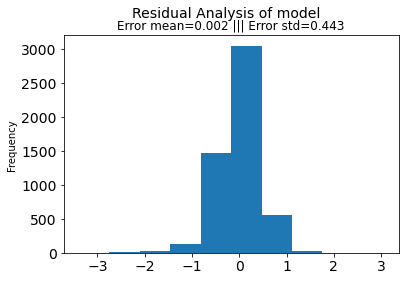

In [34]:
#Residual Analysis of Model
#Residuals in a statistical or machine learning model are the differences between observed and predicted values of data.
#Finding the ERROR in model prediction i.e. variation between predicted and actual values.
#Use it to show how well your model is performing/predicting.

fig = plt.figure()
residual_series = pd.Series(test_y-predictions)
print(residual_series)
mean, std =str(round(residual_series.mean(),3)),str(round(residual_series.std(),3))
residual_series.plot.hist(title='Error mean='+mean+' ||| Error std='+std, fontsize=14)
fig.suptitle('Residual Analysis of model', fontsize = 14)

Text(0.5, 6.79999999999999, 'Error value')

<Figure size 432x288 with 0 Axes>

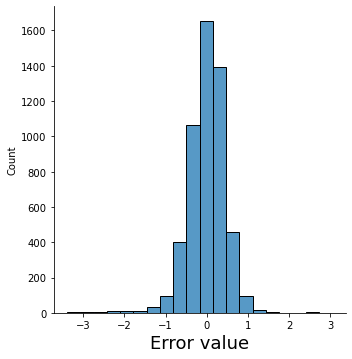

In [35]:
#Another way to plot residual analysis:
#Just for practice
fig = plt.figure()
sns.displot(residual_series, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Error value', fontsize = 18)

Text(0, 0.5, 'y_pred')

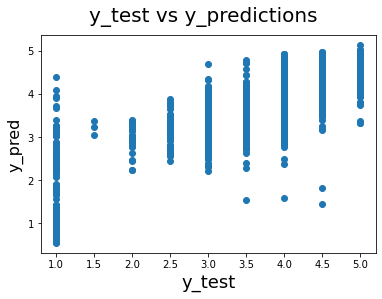

In [36]:
#EVALUATION OF THE MODEL
#Plotting y_test and y_pred to understand the spread. Works well when values are continuous. Hre rating isn't continuous, it's
#discrete.
fig = plt.figure()
plt.scatter(test_y,predictions)
fig.suptitle('y_test vs y_predictions', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [37]:
#Saving the model

filename = 'global.model'
joblib.dump(model, open(filename, 'wb'))